## Airfare ticket Price Prediction 

### *Problem Statement*

The aviation industry in India is witnessing rapid growth, with multiple airlines operating flights across various cities. However, the prices of air tickets are highly dynamic, influenced by a multitude of factors such as demand, timing, airline reputation, and more. For both airlines and passengers, predicting these prices with accuracy is crucial for maximizing revenue and ensuring affordability.
This project aims to develop a robust machine learning model that accurately predicts the air ticket prices for flights within India. By analyzing data from different airlines and flights between various cities, the model will identify key factors affecting ticket pricing and provide insights to enhance decision-making processes for stakeholders.


### *Data Description*

* Airline- The name of the airline company
* Date_of_Journey- The date on which the journey happened
* Source- The city of the departure of the flight
* Destination- The destination city/airport
* Route- The route of the flight from where to where
* Dep_Time- The departure time of the flight
* Arrival_Time- The time of the arrival of the flight to the destination
* Duration- The duration of the flight
* Total_Stops- Total number of stops during the journey
* Additional_Info- Extra/Additional information regarding flight/travel
* Price- The price of the ticket for a single journey


### *Importing Libraries*

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### *Importing Dataset*

In [2]:
data = pd.read_excel('C:/Users/91628/August- Project/Data.xlsx')

### *Dataset First view*

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


### *Dataset Last view*

In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,Null,11753


### *Shape of Dataset*

In [5]:
# Data shape, rows and columns count
print(f'Shape of the dataset is:{data.shape}')
print(f'Our dataset contains : {data.index.value_counts().sum()} Rows')
print(f'Our dataset contains : {data.columns.value_counts().sum()} Columns')

Shape of the dataset is:(10683, 11)
Our dataset contains : 10683 Rows
Our dataset contains : 11 Columns


### *Dataset information*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### *Data Description*

In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### *Missing Values/Null Values*

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We observe 2 missing values,I can directly drop these,as these are very less

### *Droping the null value colums*

In [9]:
data.dropna(inplace = True)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### *Checking Duplicates*

In [11]:
data.duplicated().sum()

220

In [12]:
df = data.drop_duplicates()

In [13]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.
* dt.day method will extract only day of that date
* dt.month method will extract only month of that date

In [14]:
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [15]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [17]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

* Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
* Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [18]:
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,Null,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-20 05:50:00,2024-08-20 13:15:00,7h 25m,2 stops,Null,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-20 09:25:00,2024-06-10 04:25:00,19h,2 stops,Null,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-08-20 18:05:00,2024-08-20 23:30:00,5h 25m,1 stop,Null,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-08-20 16:50:00,2024-08-20 21:35:00,4h 45m,1 stop,Null,13302,3,1


In [20]:
df.drop('Date_of_Journey', axis = 1, inplace = True)

From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns

In [21]:
def extract_hour(data, col):
    data[col+'_hour'] = data[col].dt.hour
    
def extract_min(data, col):
    data[col+'_min'] = data[col].dt.minute
    
def drop_col(data,col):
    data.drop(col, axis = 1, inplace = True)

In [22]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [23]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,Null,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,3,1,16,50,21,35


Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [25]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [26]:
df['Duration'] = duration

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,Null,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,3,1,16,50,21,35


In [28]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [29]:
df['dur_hour'] = df['Duration'].apply(hour)

In [30]:
df['dur_min'] = df['Duration'].apply(minutes)

In [31]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,Null,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,Null,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,Null,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,Null,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,Null,13302,3,1,16,50,21,35,4,45


In [32]:
drop_col(df,'Duration')

In [33]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [34]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [35]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

### Finding the categorical columns

In [36]:
column = [column for column in df.columns if df[column].dtype == 'object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

### Finding Continous columns

In [37]:
continous_column = [column for column in df.columns if df[column].dtype != 'object']
continous_column

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

## Handling Categorical Data

* We are using two main Encoding Techniques to covert Categorical data into some numerical format
* Nominal data -- Data that are not in any order -->one hot encoding
* ordinal data -- Data are in order --> labelEncoder

In [38]:
categorical = df[column]

In [39]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null


In [40]:
categorical['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airline Vs Price analysis

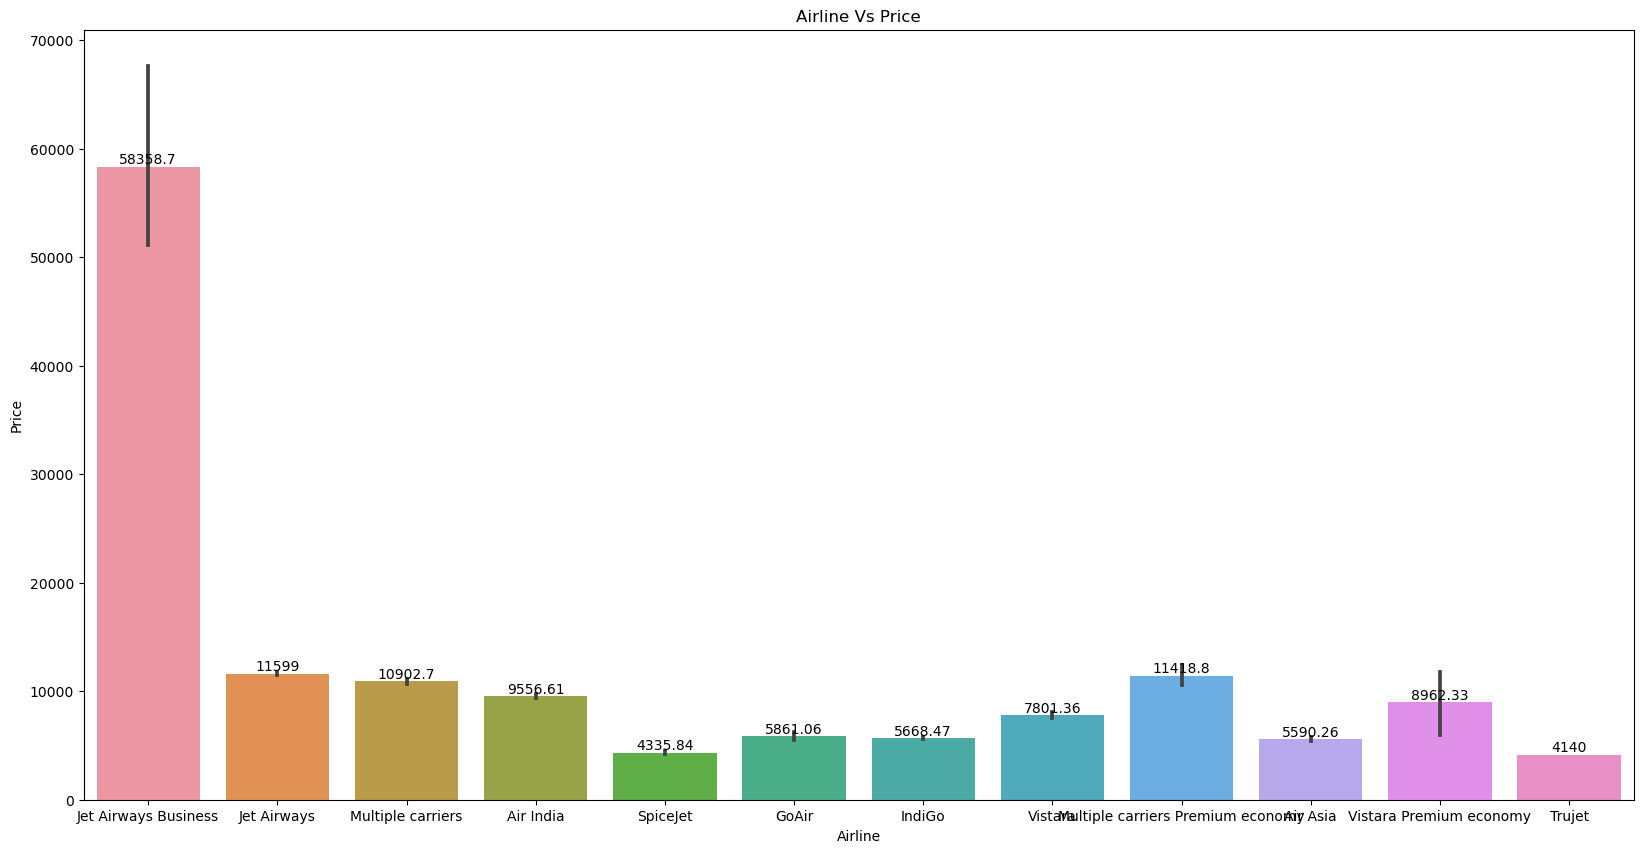

In [41]:
plt.figure(figsize = (20,10))
tx = sns.barplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline Vs Price')
for i in tx.containers:
    tx.bar_label(i,)
plt.show()

From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

## Total stops Vs Price Analysis

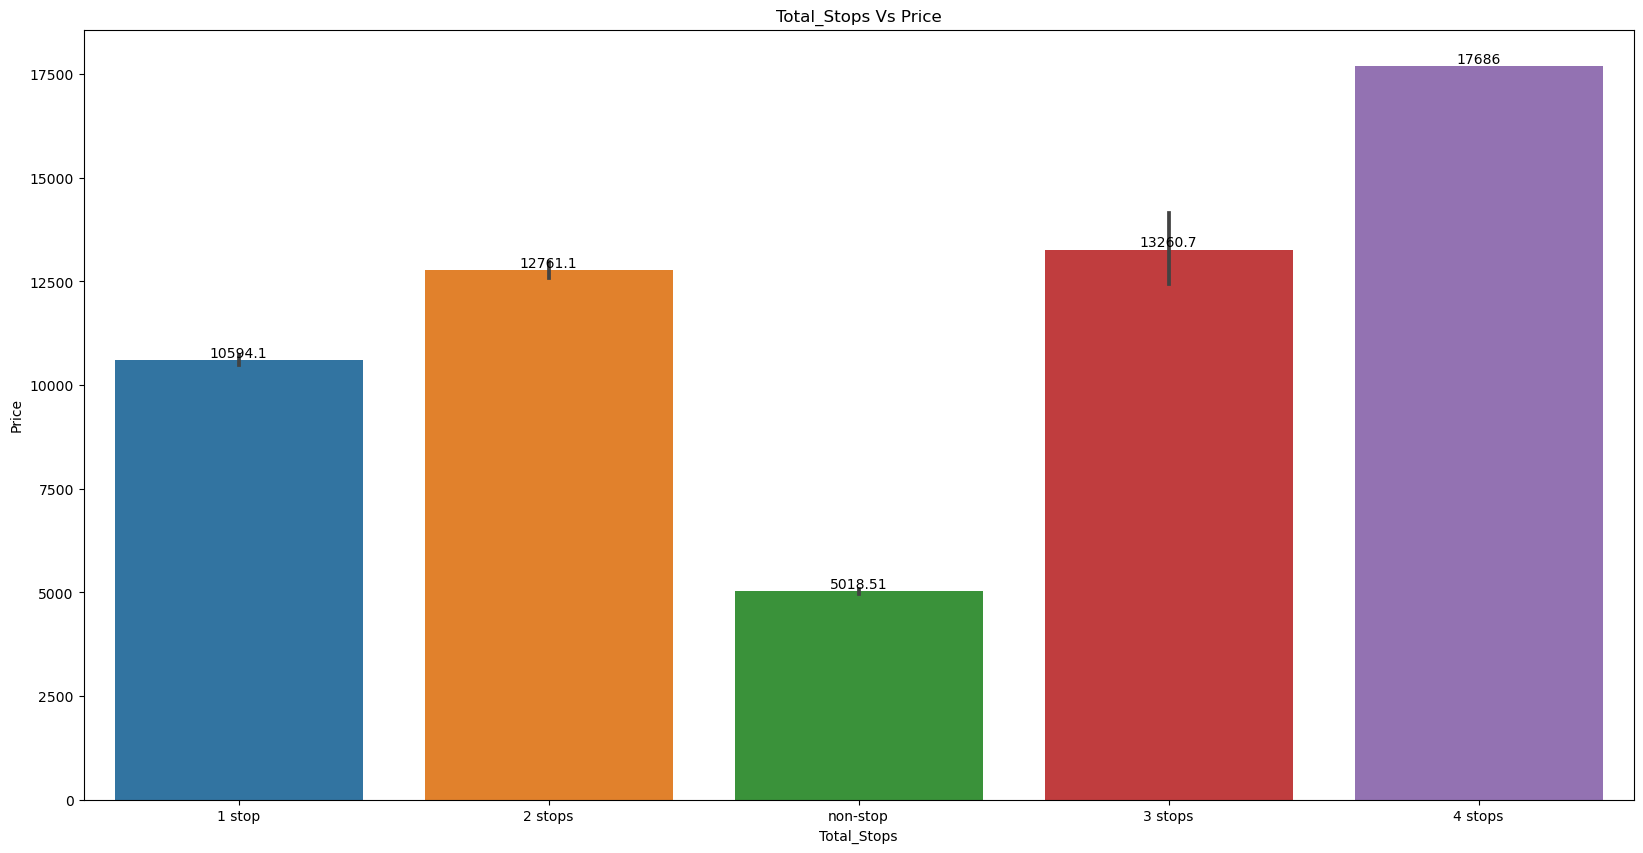

In [42]:
plt.figure(figsize = (20,10))
tx = sns.barplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.title('Total_Stops Vs Price')
for i in tx.containers:
    tx.bar_label(i,)
plt.show()

In [43]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [44]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [45]:
categorical['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## Source Vs Price Analysis

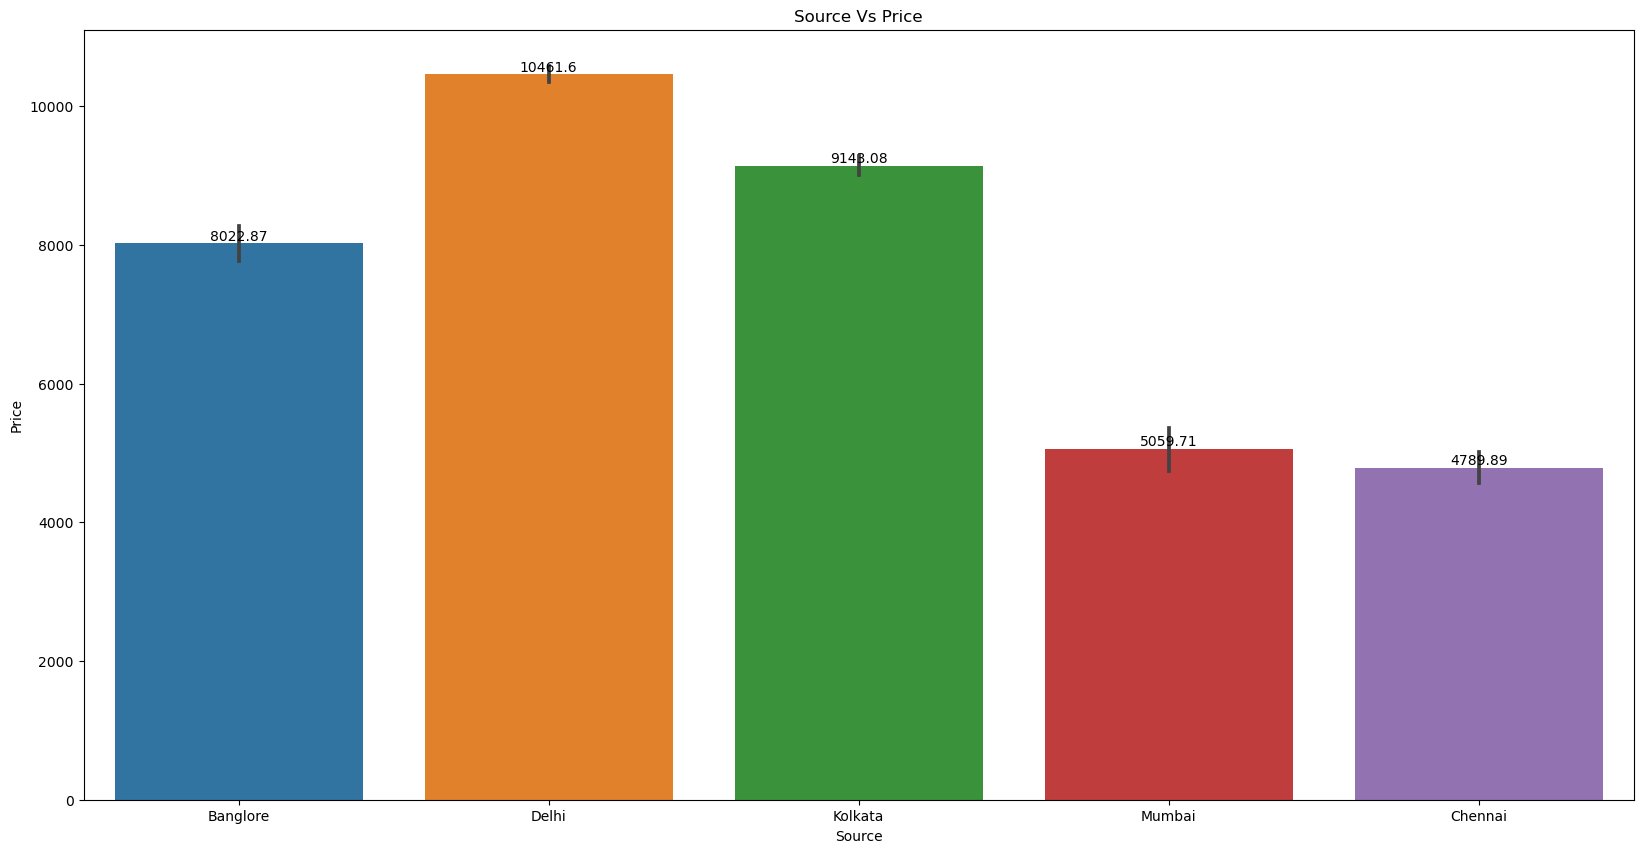

In [46]:
plt.figure(figsize = (20,10))
tx = sns.barplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Source Vs Price')
for i in tx.containers:
    tx.bar_label(i,)
plt.show()

In [47]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## Destination Vs Price Analysis

In [48]:
categorical['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

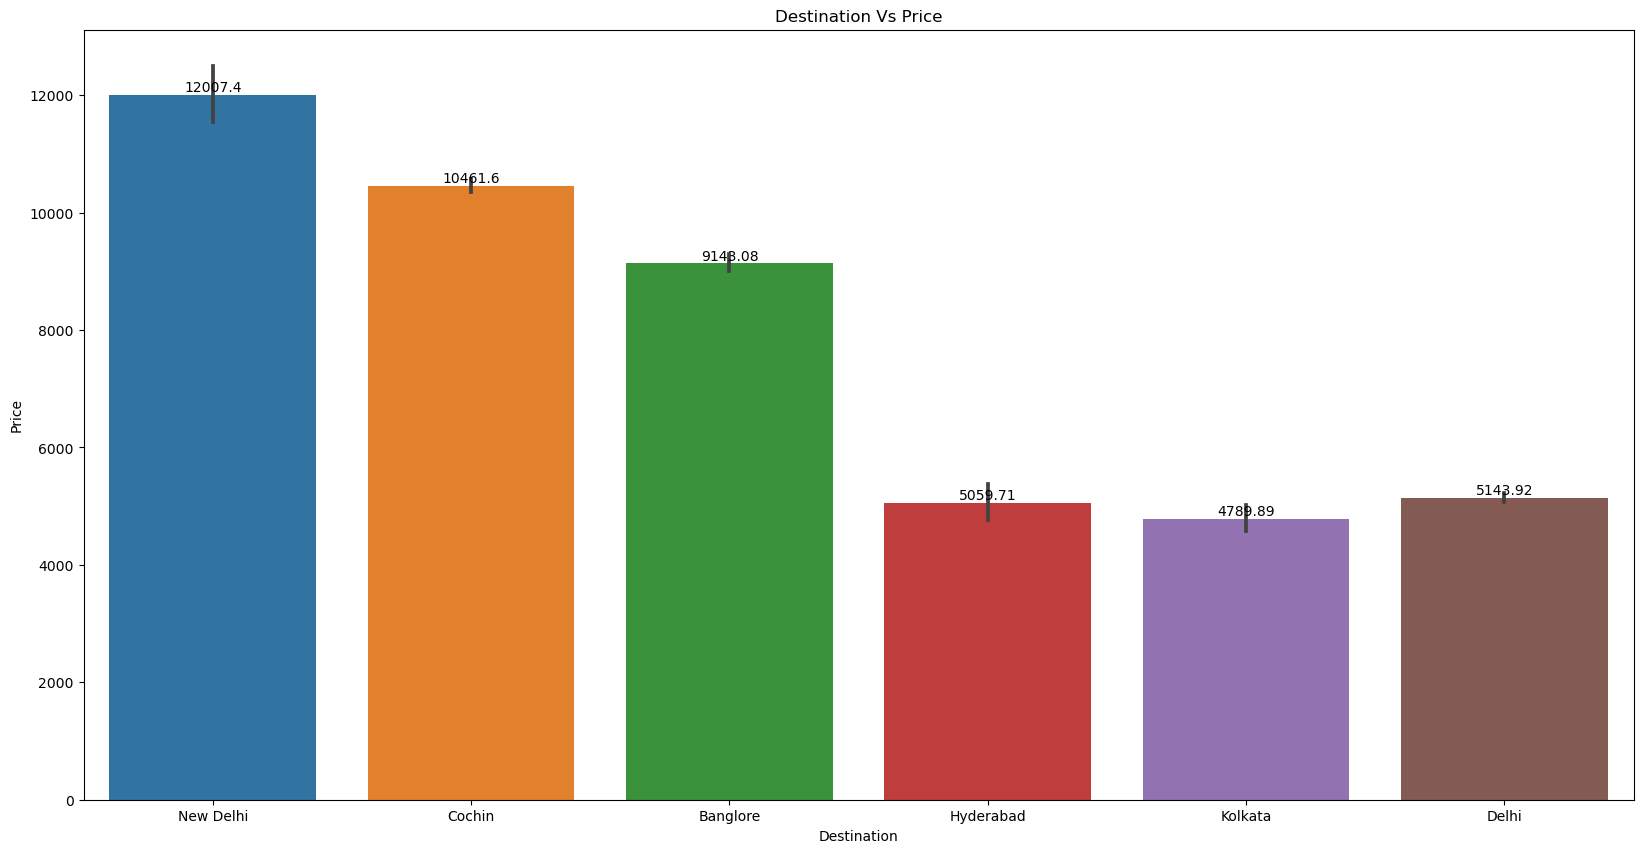

In [49]:
plt.figure(figsize = (20,10))
tx = sns.barplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))
plt.xlabel('Destination')
plt.ylabel('Price')
plt.title('Destination Vs Price')
for i in tx.containers:
    tx.bar_label(i,)
plt.show()

In [50]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [51]:
# now work on route column
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [52]:
categorical['Route1'] = categorical['Route'].str.split('→').str[0]
categorical['Route2'] = categorical['Route'].str.split('→').str[1]
categorical['Route3'] = categorical['Route'].str.split('→').str[2]
categorical['Route4'] = categorical['Route'].str.split('→').str[3]
categorical['Route5'] = categorical['Route'].str.split('→').str[4]

In [53]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,Null,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,Null,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,Null,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,Null,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,Null,BLR,NAG,DEL,NaN,NaN


In [54]:
drop_col(categorical,'Route')

In [55]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3475
Route4              9100
Route5             10418
dtype: int64

In [56]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [57]:
for i in ['Route3','Route4','Route5']:
    categorical[i].fillna('None',inplace = True)

In [58]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [59]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<Axes: xlabel='Arrival_Time_hour', ylabel='Price'>

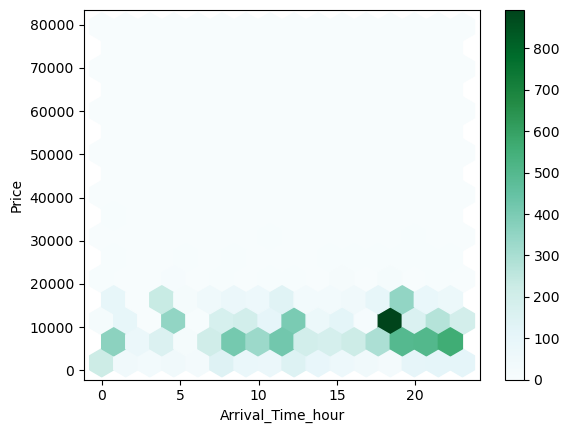

In [60]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [61]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [63]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,Null,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,Null,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,Null,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,Null,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,Null,0,34,8,13,5


In [64]:
drop_col(categorical,'Additional_Info')

In [65]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [66]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [67]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10462, dtype: int64

In [68]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

## After all preprocessing, Our data is ready for the modeling

In [69]:
final_data=pd.concat([categorical,Airline,source,destination,df[continous_column]],axis=1)

In [70]:
final_data.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [71]:
pd.set_option('display.max_columns',33)
final_data.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


## Check For Outliers

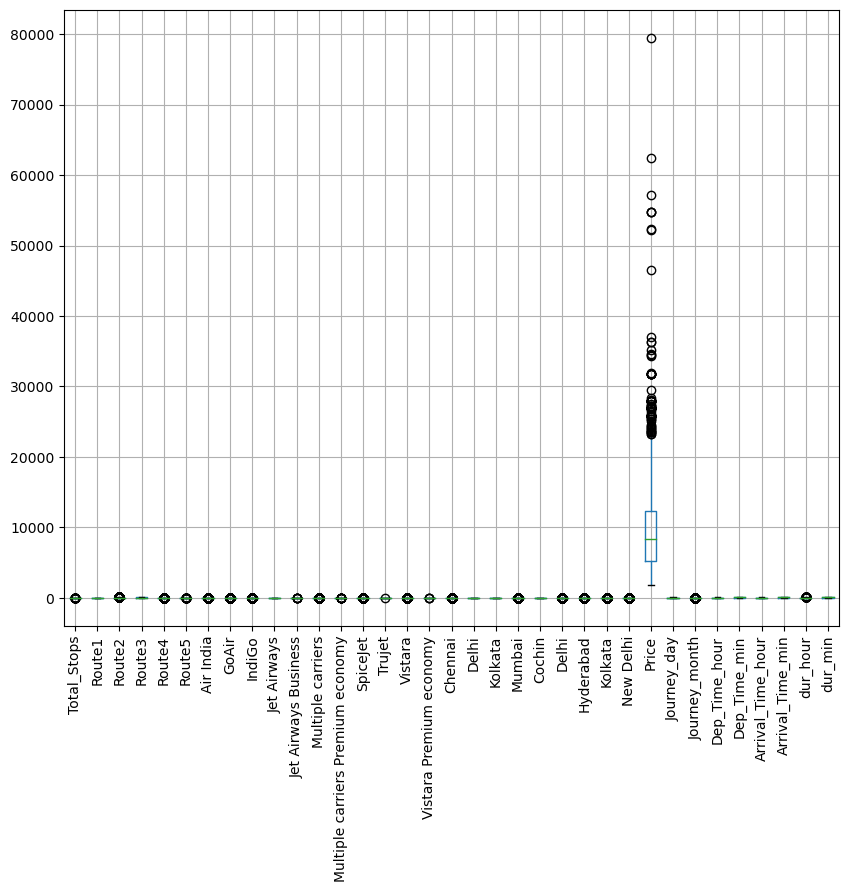

In [72]:
# Deal with outliers
plt.figure(figsize=(10,8))
final_data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

## Handling outliers

As there is some outliers in price feature,so we replace it with median

In [73]:
final_data['Price']=np.where(final_data['Price']>=40000,final_data['Price'].median(),final_data['Price'])

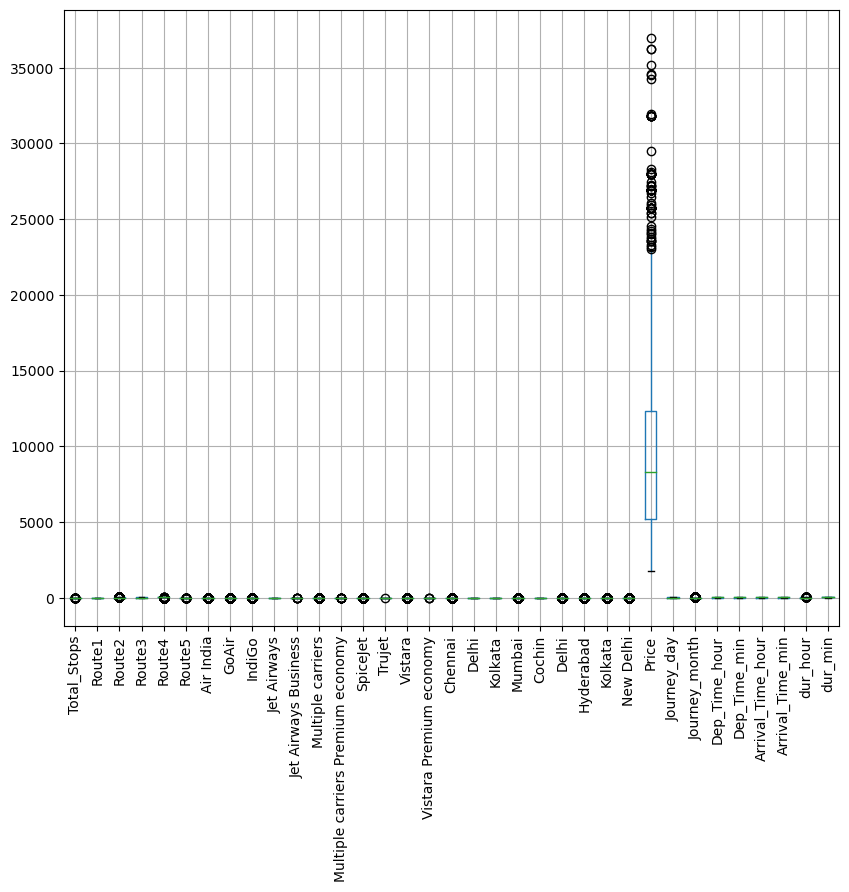

In [74]:
plt.figure(figsize=(10,8))
final_data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

## Separate the Data set into X and Y columns

In [75]:
X = final_data.drop('Price',axis = 1)
y = df['Price']

In [76]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9542536798540845
Predictions are: [11840.0347619   3994.992       9885.74033333 ... 15835.37566667
  8860.94       13393.7525    ]


r2 score is: 0.8237998847216983
MAE:1137.6335363228904
MSE:3305636.5690794517
RMSE:1818.140965128791


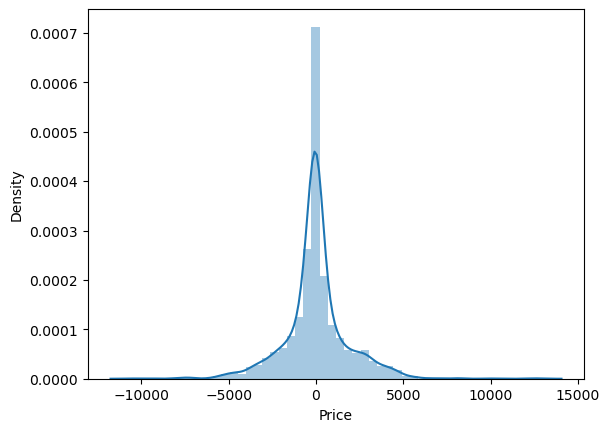

In [79]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.34854821364559685
Predictions are: [10844  3873 19225 ... 17057  4729  6117]


r2 score is: 0.3980991752582054
MAE:1995.9278547539418
MSE:11292077.613473482
RMSE:3360.368672255097


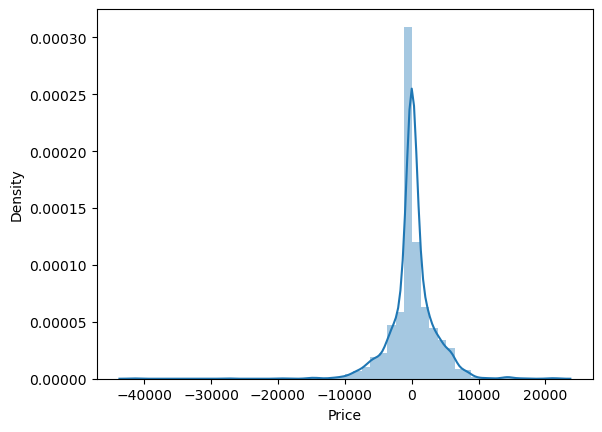

In [80]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7481455935719299
Predictions are: [10448.   4216.6 10523.6 ... 15571.6  5367.2 13243. ]


r2 score is: 0.6454750267383389
MAE:1710.2844720496894
MSE:6651134.787367415
RMSE:2578.9794080929405


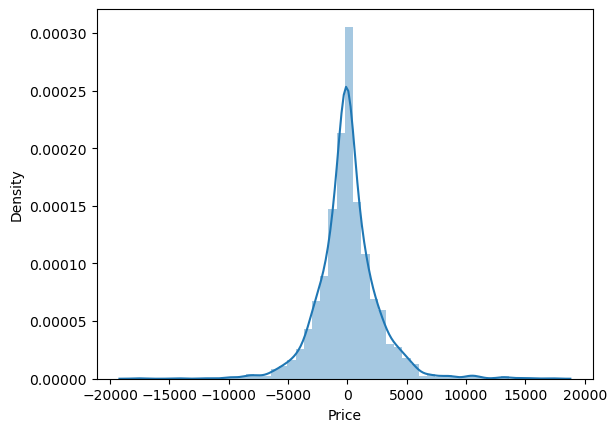

In [81]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9709937132681244
Predictions are: [10844.  3857. 19225. ... 14973.  8580. 13033.]


r2 score is: 0.6974175930343482
MAE:1331.3843446408664
MSE:5676656.159083188
RMSE:2382.573432044265


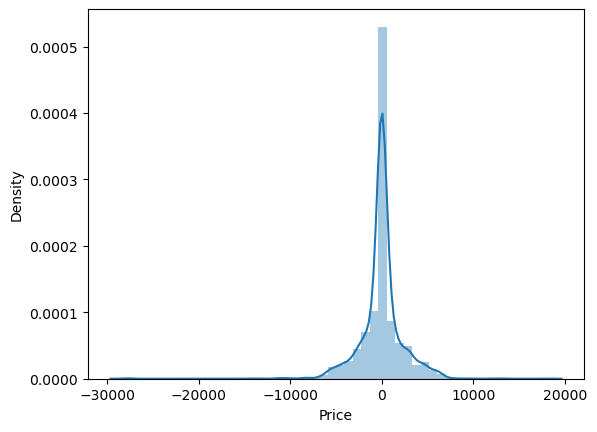

In [82]:
predict(DecisionTreeRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.8032527034751997
Predictions are: [12039.17110178  4162.29194427  9226.63398508 ... 15385.98316931
  9682.82677042 12817.77246159]


r2 score is: 0.7838670272744818
MAE:1455.0131675870368
MSE:4054804.716199337
RMSE:2013.6545672481507


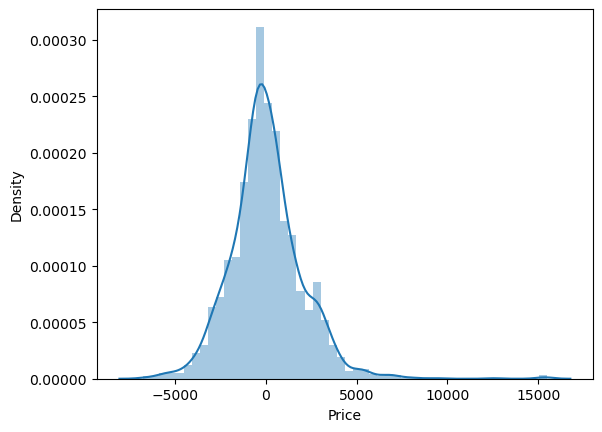

In [83]:
predict(GradientBoostingRegressor())

## *Hyper Tuning the Model*

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [86]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 180, 'max_features': 'sqrt', 'max_depth': 15}

In [87]:
# best parameter
rf_random.best_params_

{'n_estimators': 180, 'max_features': 'sqrt', 'max_depth': 15}

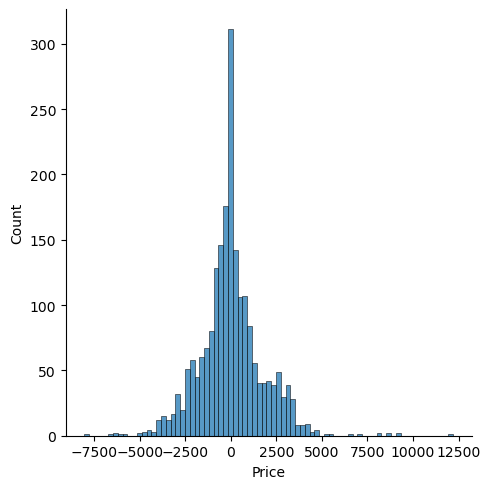

In [88]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [89]:
r2_score(y_test,prediction)

0.8385157094691313

## *After HyperTuning the Accuracy increses*